In [151]:
import pandas as pd
import os
import shutil

In [152]:
FILE_PATH = "metadata.csv"
IMAGE_PATH = "images"

In [153]:
df = pd.read_csv(FILE_PATH)
print(df.shape)

(950, 30)


In [154]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [155]:
TARGET_DIR = "train/covid"

if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("Covid folder created")

In [156]:
# Copy COVID-19 images with view point PA from Downloaded directory to Target Directory
cnt = 0
for(i, row) in df.iterrows():
    if "COVID-19" in row["finding"] and row["view"] =="PA":
        filename = row["filename"]
        image_path = os.path.join(IMAGE_PATH,filename) #IMAGE_PATH + filename
        image_copy_path = os.path.join(TARGET_DIR,filename) #TARGET_DIR + filename
        shutil.copy2(image_path,image_copy_path) #Copy From IMAGE_PATH to TARGET_DIrectory
        cnt+=1

In [157]:
TARGET_NORMAL_DIR = "train/normal"
TRAIN_PATH = "train"
VAL_PATH = "val"

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [159]:
# VGG16
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss='binary_crossentropy',optimizer = "adam",metrics=["accuracy"])

In [160]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_40 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 110, 110, 64)     0         
 g2D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 110, 110, 64)      0         
                                                                 
 conv2d_41 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                 

In [161]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [162]:
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 430 images belonging to 2 classes.


In [163]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [164]:
validation_generator = test_dataset.flow_from_directory(
    'val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 100 images belonging to 2 classes.


In [165]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/5
8/8 [==============================] - 37s 4s/step - loss: 0.7597 - accuracy: 0.5084 - val_loss: 0.6929 - val_accuracy: 0.4375
Epoch 2/5
8/8 [==============================] - 36s 5s/step - loss: 0.6847 - accuracy: 0.5859 - val_loss: 0.6837 - val_accuracy: 0.8125
Epoch 3/5
8/8 [==============================] - 32s 4s/step - loss: 0.5706 - accuracy: 0.7521 - val_loss: 0.4993 - val_accuracy: 0.8281
Epoch 4/5
8/8 [==============================] - 47s 6s/step - loss: 0.5230 - accuracy: 0.7941 - val_loss: 0.4562 - val_accuracy: 0.8594
Epoch 5/5
8/8 [==============================] - 36s 4s/step - loss: 0.3628 - accuracy: 0.8320 - val_loss: 0.5708 - val_accuracy: 0.7969


In [166]:
model.save("Detection_Covid_19.h5")

In [167]:
model = load_model("Detection_Covid_19.h5")

In [168]:
from keras.utils import load_img, img_to_array

y_actual = []
y_test = []

for i in os.listdir("./val/normal"):
  img = load_img("./val/normal/"+i,target_size=(224,224))
  img = img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(1)

1/1 [==============================] - 0s 57ms/step


In [169]:
for i in os.listdir("./val/covid"):
  img = load_img("./val/covid/"+i,target_size=(224,224))
  img = img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)

1/1 [==============================] - 0s 58ms/step


In [170]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)
y_test_arr = []
for i in y_test:
    if i > 0.5:
        y_test_arr.append(1)
    else:
        y_test_arr.append(0)

<AxesSubplot: >

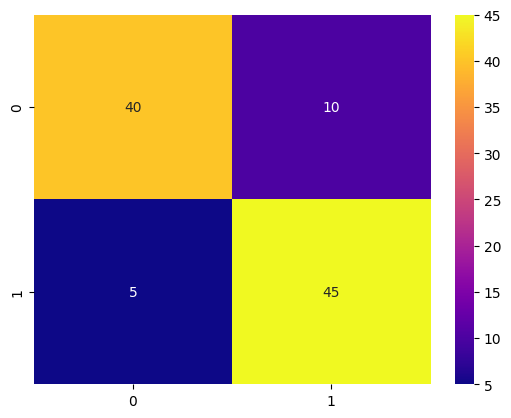

In [171]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_actual,y_test_arr)
sns.heatmap(cm,cmap = "plasma" , annot=True)

In [172]:
history = hist
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


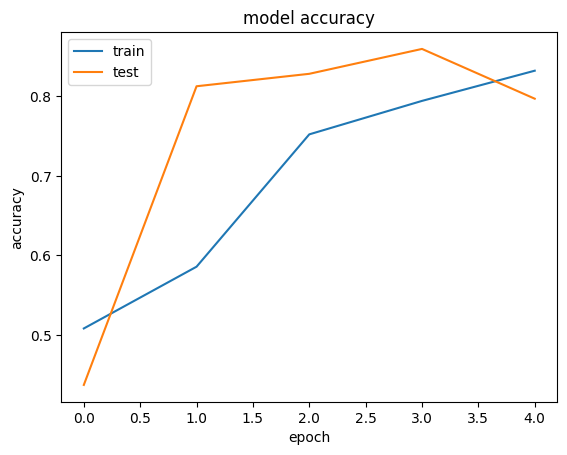

In [173]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

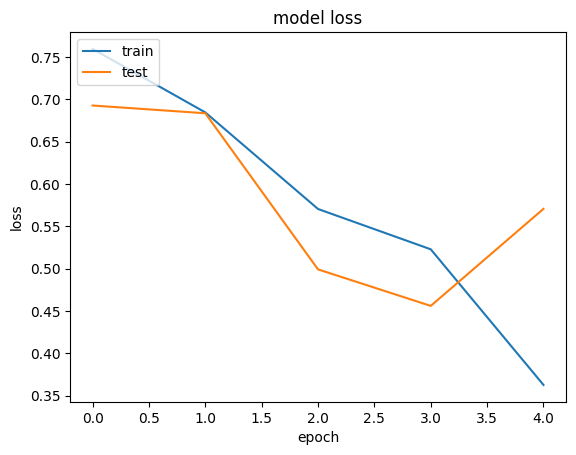

In [174]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 61ms/step
This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Positive For Covid-19


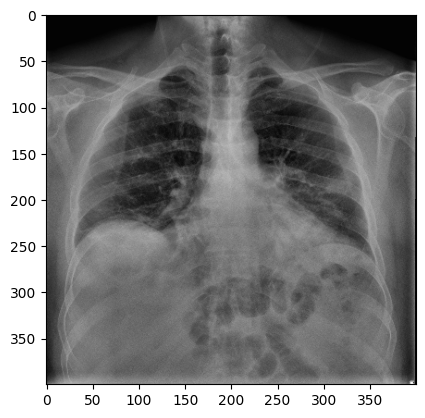

In [175]:
import numpy as np
import cv2
from keras.preprocessing import image

xtest_image = load_img('predict/covid/0a7faa2a.jpg', target_size = (224, 224))
xtest_image = img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict(xtest_image)
# training_set.class_indices
imggg = cv2.imread('predict/covid/0a7faa2a.jpg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

1/1 [==============================] - 0s 50ms/step
This Xray Image is of Negative covid-19 patient
Prediction Of Our Model :  Negative for Covid-19


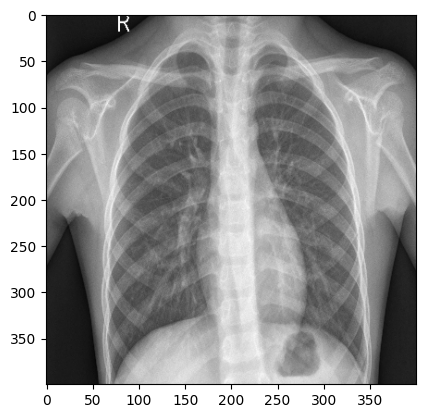

In [176]:
xtest_image = load_img('predict/normal/IM-0001-0001.jpeg', target_size = (224, 224))
xtest_image = img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict(xtest_image)

imggg = cv2.imread('predict/normal/IM-0001-0001.jpeg')
print("This Xray Image is of Negative covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

In [177]:
# Alex Net
model = Sequential()
model.add(Conv2D(32,kernel_size=(11,11),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss='binary_crossentropy',optimizer = "adam",metrics=["accuracy"])

In [178]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 214, 214, 32)      11648     
                                                                 
 conv2d_45 (Conv2D)          (None, 210, 210, 64)      51264     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 70, 70, 64)       0         
 g2D)                                                            
                                                                 
 dropout_44 (Dropout)        (None, 70, 70, 64)        0         
                                                                 
 conv2d_46 (Conv2D)          (None, 68, 68, 128)       73856     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 22, 22, 128)      0         
 g2D)                                                

In [179]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [180]:
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 430 images belonging to 2 classes.


In [181]:
validation_generator = test_dataset.flow_from_directory(
    'val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 100 images belonging to 2 classes.


In [182]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/5
8/8 [==============================] - 53s 6s/step - loss: 1.4047 - accuracy: 0.5508 - val_loss: 0.6866 - val_accuracy: 0.9219
Epoch 2/5
8/8 [==============================] - 60s 7s/step - loss: 0.6829 - accuracy: 0.5742 - val_loss: 0.6689 - val_accuracy: 0.6094
Epoch 3/5
8/8 [==============================] - 53s 7s/step - loss: 0.6473 - accuracy: 0.6016 - val_loss: 0.6338 - val_accuracy: 0.8125
Epoch 4/5
8/8 [==============================] - 55s 7s/step - loss: 0.5169 - accuracy: 0.7734 - val_loss: 0.4435 - val_accuracy: 0.8125
Epoch 5/5
8/8 [==============================] - 50s 6s/step - loss: 0.4352 - accuracy: 0.7647 - val_loss: 0.4111 - val_accuracy: 0.8281


In [183]:
history = hist
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


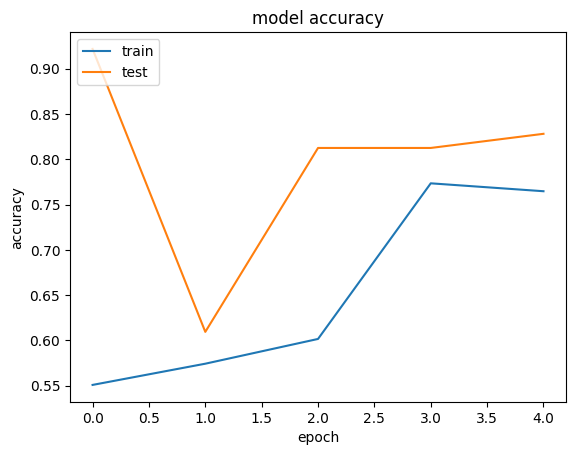

In [184]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

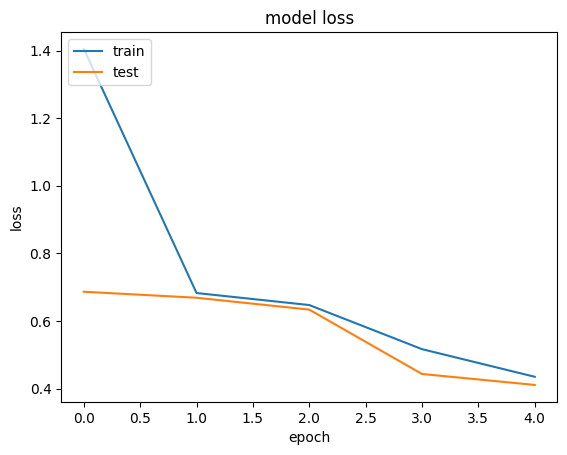

In [185]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()